In [1]:
using JLD2, CairoMakie, StatsBase
using Jchemo, JchemoData

In [2]:
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data", "iris.jld2")
@load db dat

1-element Vector{Symbol}:
 :dat

In [3]:
pnames(dat)

(:X,)

In [4]:
summ(dat.X)

(res = 5×7 DataFrame
 Row │ variable      mean    std     min     max        n      nmissing 
     │ Symbol        Union…  Union…  Any     Any        Int64  Int64    
─────┼──────────────────────────────────────────────────────────────────
   1 │ sepal_length  5.843   0.828   4.3     7.9          150         0
   2 │ sepal_width   3.057   0.436   2.0     4.4          150         0
   3 │ petal_length  3.758   1.765   1.0     6.9          150         0
   4 │ petal_width   1.199   0.762   0.1     2.5          150         0
   5 │ species                       setosa  virginica    150         0, ntot = 150)

In [5]:
X = dat.X[:, 1:4]
y = dat.X[:, 5]
n = nro(X)

150

In [6]:
@head X

... (150, 4)
 


Row,sepal_length,sepal_width,petal_length,petal_width
,Float64,Float64,Float64,Float64
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2


In [7]:
tab(y)

OrderedCollections.OrderedDict{String, Int64} with 3 entries:
  "setosa"     => 50
  "versicolor" => 50
  "virginica"  => 50

In [8]:
ntrain = 120
s = sample(1:n, ntrain; replace = false)
Xtrain = X[s, :]
ytrain = y[s]
Xtest = rmrow(X, s)
ytest = rmrow(y, s)

30-element Vector{String}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [9]:
tab(ytrain)

OrderedCollections.OrderedDict{String, Int64} with 3 entries:
  "setosa"     => 40
  "versicolor" => 40
  "virginica"  => 40

In [10]:
tab(ytest)

OrderedCollections.OrderedDict{String, Int64} with 3 entries:
  "setosa"     => 10
  "versicolor" => 10
  "virginica"  => 10

In [11]:
fm = fda(Xtrain, ytrain; nlv = 2) ;
#fm = fdasvd(Xtrain, ytrain; nlv = 2) ;
pnames(fm)

(:T, :P, :Tcenters, :eig, :sstot, :W, :xmeans, :xscales, :lev, :ni)

In [12]:
lev = fm.lev

3-element Vector{String}:
 "setosa"
 "versicolor"
 "virginica"

In [13]:
nlev = length(lev)

3

In [14]:
fm.T

120×2 Matrix{Float64}:
  7.27106   0.441305
 -5.42148   0.417766
 -1.57203  -0.165102
  7.56594   0.780102
 -2.61124   0.814685
 -2.77304   0.470452
  8.14682  -1.54122
 -1.47812   0.443179
 -6.97837  -1.72885
 -2.49833   0.778477
  ⋮        
 -7.85492  -0.0417687
 -4.79209   0.464886
  9.65846  -2.81385
 -5.37351  -1.81784
  8.0453   -1.23454
 -2.55051  -0.918972
  8.13271   0.0931604
 -4.25895  -0.179424
  7.72519   0.217594

In [15]:
# Class centers projected on the score space
ct = fm.Tcenters

3×2 Matrix{Float64}:
  7.9212   -0.194871
 -2.01232   0.691656
 -5.90889  -0.496785

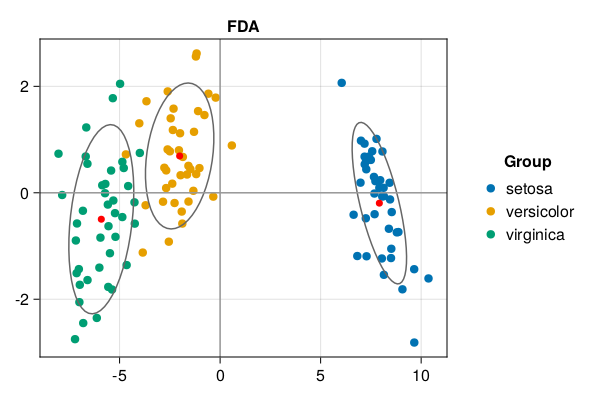

In [16]:
f, ax = plotxy(fm.T[:, 1:2], ytrain;
    ellipse = true, title = "FDA", zeros = true)
scatter!(ax, ct[:, 1], ct[:, 2],
    markersize = 10, color = :red)
f

In [17]:
# Projection of Xtest to the score space
Ttest = Jchemo.transform(fm, Xtest)

30×2 Matrix{Float64}:
  8.6202   -0.600204
  7.79079   0.856019
  8.24398  -0.601551
  9.22572  -0.898486
  8.3856   -0.288089
  7.79565  -0.521904
  9.99158  -1.95482
  9.08476  -0.405112
  8.83393  -0.367736
  8.56315  -0.91973
  ⋮        
 -6.63671  -0.550915
 -6.19017   0.140333
 -6.06873  -1.94479
 -9.70362   0.615798
 -7.20836  -0.853864
 -4.09251  -0.654514
 -5.72355  -0.00844747
 -7.17705  -2.36184
 -5.92523  -1.53142

In [18]:
# X-loadings matrix
# Columns of P = coefficients of the linear discriminant function
# = "LD" of function lda of package MASS
fm.P

4×2 Matrix{Float64}:
  0.7928    0.0642351
  1.62496  -2.31122
 -2.30659   0.68147
 -2.93007  -2.38892

In [19]:
fm.P' * fm.P    # not orthogonal

2×2 Matrix{Float64}:
 17.1747    1.72312
  1.72312  11.5172

In [20]:
fm.eig

4-element Vector{Float64}:
 33.90327775437844
  0.2543862150638546
 -1.9872517357900566e-15
 -1.9872517357900566e-15

In [21]:
fm.sstot

34.1576639694423

In [22]:
# Explained variance by PCA of the class centers
# in transformed scale
summary(fm)

(explvarx = 2×4 DataFrame
 Row │ lv     var        pvar        cumpvar  
     │ Int64  Float64    Float64     Float64  
─────┼────────────────────────────────────────
   1 │     1  33.9033    0.992553    0.992553
   2 │     2   0.254386  0.00744741  1.0,)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*